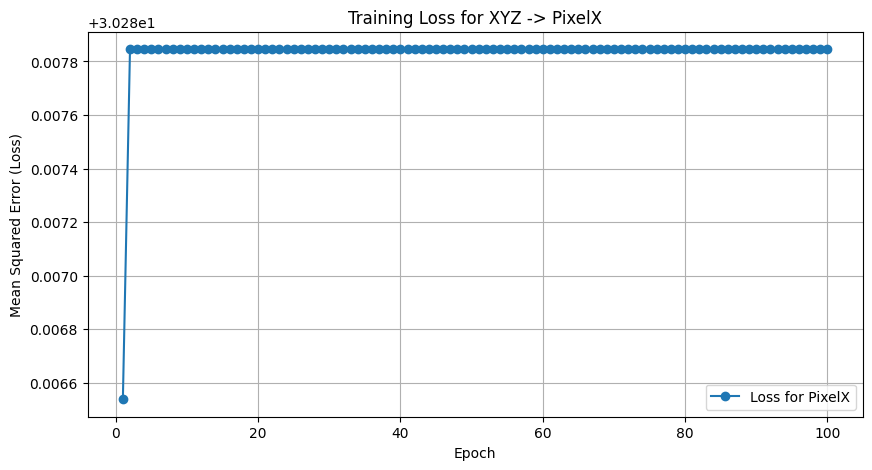

Test MSE for XYZ -> PixelX: 32.04948722433476


['xyz_to_pixelX_model.pkl']

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Load dataset
df = pd.read_csv('output.csv')

# Prepare data for (X, Y, Z) -> PixelX
X_xyz = df[['X', 'Y', 'Z']].values
y_pixelX = df['PixelX'].values  # Target for PixelX

# Split datasets
X_train_xyz, X_test_xyz, y_train_pixelX, y_test_pixelX = train_test_split(X_xyz, y_pixelX, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_xyz)
X_test_scaled = scaler.transform(X_test_xyz)

# Initialize model with adjusted hyperparameters
model_xyz_to_pixelX = SGDRegressor(max_iter=1000, learning_rate='adaptive', eta0=0.01, random_state=42, warm_start=True)

# Train model and track loss
losses_pixelX = []
for epoch in range(100):
    model_xyz_to_pixelX.fit(X_train_scaled, y_train_pixelX)
    y_pred_pixelX = model_xyz_to_pixelX.predict(X_train_scaled)
    mse_pixelX = mean_squared_error(y_train_pixelX, y_pred_pixelX)
    losses_pixelX.append(mse_pixelX)

# Plot the loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), losses_pixelX, label='Loss for PixelX', marker='o')
plt.title('Training Loss for XYZ -> PixelX')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid()
plt.show()

# Evaluate model on the test set
mse_test_pixelX = mean_squared_error(y_test_pixelX, model_xyz_to_pixelX.predict(X_test_scaled))
print(f"Test MSE for XYZ -> PixelX: {mse_test_pixelX}")

# Save the model
joblib.dump(model_xyz_to_pixelX, 'xyz_to_pixelX_model.pkl')


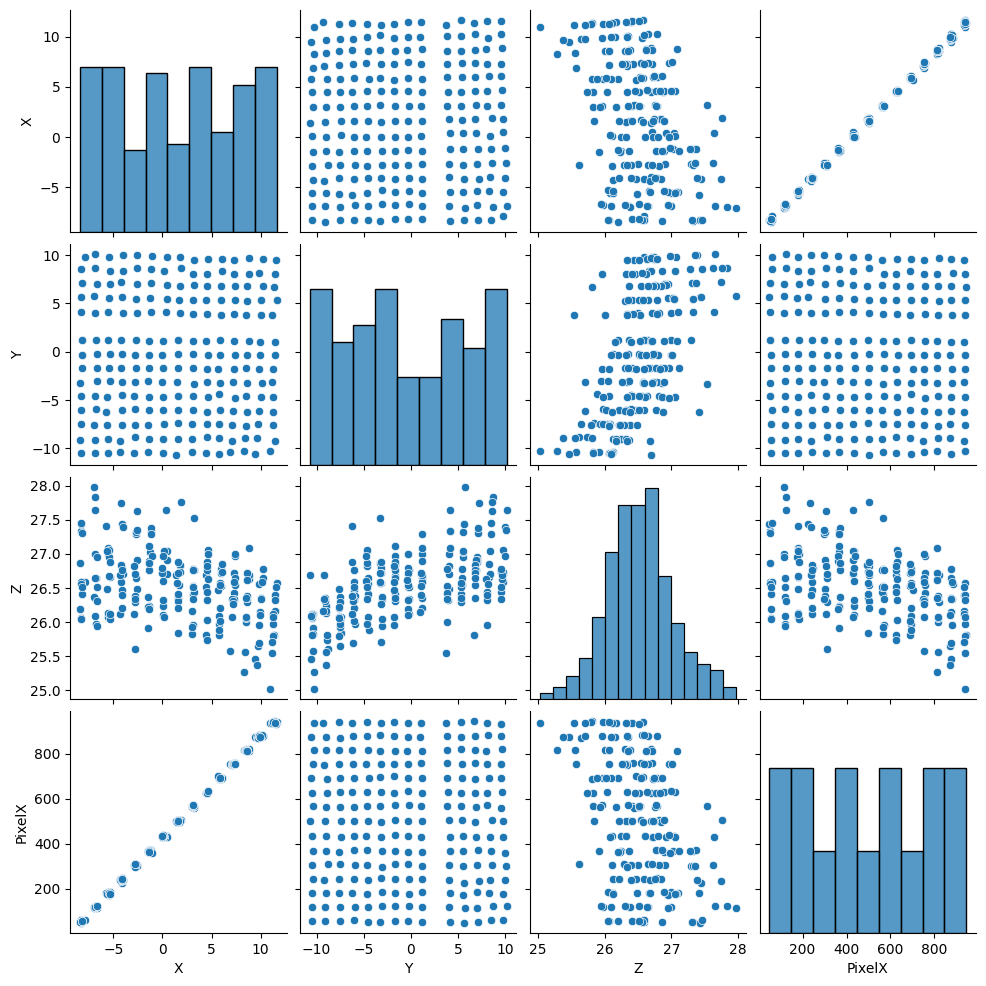

In [3]:
import seaborn as sns

sns.pairplot(df[['X', 'Y', 'Z', 'PixelX']])
plt.show()


In [4]:
print(df[['X', 'Y', 'Z']].describe())

                X           Y           Z
count  210.000000  210.000000  210.000000
mean     1.580767   -0.535552   26.530638
std      6.092941    6.417268    0.505360
min     -8.404000  -10.725000   25.021000
25%     -4.071750   -6.064000   26.197500
50%      1.624500   -1.012000   26.538000
75%      7.199000    5.383000   26.815750
max     11.644000   10.137000   27.974000


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Load data from CSV
data = pd.read_csv('output.csv')

# Extract features (X, Y, Z) and target (PixelX, PixelY)
X = data[['X', 'Y', 'Z']]
y = data[['PixelX', 'PixelY']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict PixelX, PixelY on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model (optional)
print(f"Predicted values:\n{y_pred}")


Predicted values:
[[203.13239386 711.36140082]
 [830.48768585 891.81058681]
 [350.61403825 532.89829585]
 [985.97475941 794.34598439]
 [336.3977205  942.92184334]
 [754.92709249 650.72291321]
 [277.64829928 884.47267043]
 [905.11616355 545.9326083 ]
 [ 84.31272706 305.21164331]
 [981.55746181 583.66519435]
 [602.05943511 288.03867696]
 [905.26193987 995.33100163]
 [968.13125061 399.90685725]
 [594.05901819 533.02104926]
 [154.03675992 639.83731704]
 [355.37290811 866.1356646 ]
 [749.48845583 336.39549159]
 [244.50509965 947.68231373]
 [826.45237095 588.81009049]
 [381.95471345 155.40050306]
 [405.0481894  958.6231598 ]
 [160.47944226 459.58273667]
 [669.62540604 127.52424513]
 [443.87630422 302.45352631]
 [452.28104887 216.89583923]
 [672.52756217 765.40806569]
 [134.30266042 334.97882309]
 [530.92933048 423.93756588]
 [224.92363691 868.17975304]
 [833.68588368 982.6479885 ]
 [888.70528624 336.43800863]
 [204.45304421 459.15342006]
 [465.49395212 826.79265903]
 [230.51809791 301.168028

/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


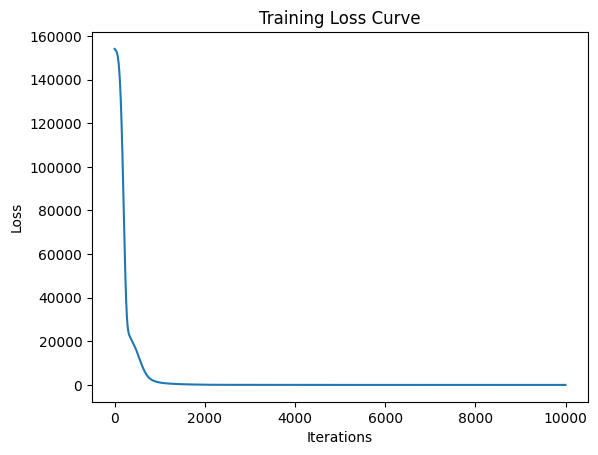

Predicted values:
[[177.5748169  752.70745212]
 [817.92122622 871.62027571]
 [430.26116522 561.312833  ]
 [945.15934156 823.18920205]
 [302.2746834  883.27179243]
 [752.95404017 686.07426256]
 [231.04043463 818.98071318]
 [877.05087984 557.75929646]
 [ 55.46847303 242.10328695]
 [938.83364783 561.00409435]
 [634.97278934 309.2154809 ]
 [876.31996271 938.2710404 ]
 [938.34108876 376.43792287]
 [629.07548433 564.517788  ]
 [114.53922087 685.59736106]
 [365.08364595 820.67727621]
 [756.49632477 372.56063778]
 [119.65439496 881.3163921 ]
 [812.69617091 565.12909541]
 [433.45111382 240.25291558]
 [366.94752559 948.99442383]
 [245.49888697 495.32392873]
 [691.91039172 120.67121157]
 [495.89388568 367.18840079]
 [500.58016744 305.1783699 ]
 [694.68437849 753.4204943 ]
 [117.98471958 364.71785771]
 [568.90577364 497.24051413]
 [112.559404   754.65370857]
 [816.97636358 943.25886862]
 [877.50254444 309.69818061]
 [303.61648933 494.13673647]
 [498.30381928 814.13120583]
 [301.71852465 369.486720

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Load data from CSV
data = pd.read_csv('output.csv')

# Extract features (X, Y, Z) and target (PixelX, PixelY)
X = data[['X', 'Y', 'Z']]
y = data[['PixelX', 'PixelY']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=10000, random_state=42, warm_start=True)
model.fit(X_train_scaled, y_train)

# Get the training loss values
loss_values = model.loss_curve_

# Plot the loss graph
plt.plot(loss_values)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Predict PixelX, PixelY on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model (optional)
print(f"Predicted values:\n{y_pred}")


/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/arjun/Desktop/AI_ENV/l

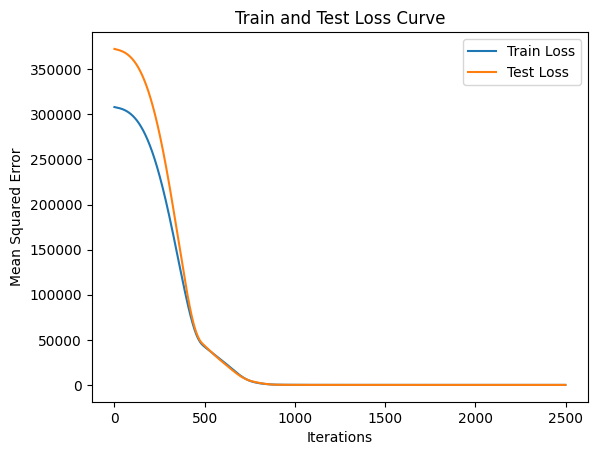

Predicted values:
[[172.63251938 750.8990054 ]
 [821.56337785 875.85071222]
 [423.40552878 554.33133947]
 [947.7146724  818.86836552]
 [312.04628632 892.7146912 ]
 [754.88923216 685.7836645 ]
 [241.17851429 825.53601291]
 [879.66687818 563.45903934]
 [ 62.6473222  242.81336554]
 [943.45118382 570.77412779]
 [630.63879805 312.7160439 ]
 [884.65113179 950.62939143]
 [938.22986147 375.19773473]
 [624.90106647 559.29226253]
 [110.2425883  681.36853154]
 [369.37549813 826.38821429]
 [754.01633609 373.2181743 ]
 [123.08422072 887.40612142]
 [816.24079143 572.02840323]
 [433.53249737 238.27400232]
 [369.6648473  957.72331732]
 [237.41500933 492.30314892]
 [693.52680085 119.03481564]
 [493.87831544 362.05082405]
 [501.51395705 300.22519055]
 [693.21404471 753.39939553]
 [123.05584121 368.12139893]
 [567.96626261 493.41099743]
 [131.81467541 763.15572491]
 [824.48015494 950.29112541]
 [877.65877282 311.48582119]
 [295.73139388 488.55547306]
 [498.41155681 816.23167381]
 [299.39685392 364.452156

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load data from CSV
data = pd.read_csv('output.csv')

# Extract features (X, Y, Z) and target (PixelX, PixelY)
X = data[['X', 'Y', 'Z']]
y = data[['PixelX', 'PixelY']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1, warm_start=True, random_state=42)

# Lists to store loss values
train_losses = []
test_losses = []

# Train the model and calculate train and test losses at each iteration
for _ in range(2500):  # Train for 1000 iterations
    model.fit(X_train_scaled, y_train)  # Train the model for one iteration
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    # Calculate train and test losses (MSE)
    train_loss = mean_squared_error(y_train, train_pred)
    test_loss = mean_squared_error(y_test, test_pred)
    
    # Append the losses to the lists
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Train and Test Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Evaluate the final model (optional)
y_pred = model.predict(X_test_scaled)
print(f"Predicted values:\n{y_pred}")


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained model
# If you've saved the model previously, load it using joblib or pickle
# from joblib import load
# model = load('trained_model.joblib')

# Example input for prediction (X, Y, Z values)
input_data = {'X': [-8.179], 'Y': [1.226], 'Z': [26.594]}  # Replace with your input data

# Load and preprocess the data
data = pd.DataFrame(input_data)
scaler = StandardScaler()

# Fit the scaler on the original training data (you can save and reuse the scaler if needed)
# Fit on the training data used to train the model
# X_train_scaled is the scaled version of your original training data (make sure to use the same scaler)
scaler.fit(X_train)   # Uncomment if you need to fit on the original training data

# Scale the input data using the scaler
input_scaled = scaler.transform(data)

# Perform prediction with the trained model
predicted_pixel = model.predict(input_scaled)

# Output the predicted PixelX and PixelY values
print(f"Predicted PixelX: {predicted_pixel[0][0]}, Predicted PixelY: {predicted_pixel[0][1]}")


Predicted PixelX: 56.25739957663992, Predicted PixelY: 555.2232747338037
